In [70]:
from learn_orbital_physics import *
import pandas as pd
import numpy as np

device = torch.device("cuda")
print(device)

def time_series(file):
    file = "csv/" + file  ## à adapter
    table = pd.read_csv(file)
    #print(table.columns)
    table["Date (TDB)"] = pd.to_datetime(table["Date (TDB)"])
    init_date = table["Date (TDB)"].values[0]
    table["Time"] = [(date-init_date).total_seconds() for date in table["Date (TDB)"]]
    #print(table.head(5))
    return table

def time_series_to_tensor(list_series):
    times = torch.Tensor(list_series[0]["Time"])
    pos_tensor = torch.Tensor([[[planet.iloc[time][pos] for pos in ["X (km)","Y (km)", "Z (km)"]] 
                                for planet in list_series] 
                                for time in range(len(list_series[0]))])
    vel_tensor = torch.Tensor([[[planet.iloc[time][vel] for vel in ["VX (km/s)","VY (km/s)", "VZ (km/s)"]] 
                                for planet in list_series] 
                                for time in range(len(list_series[0]))])
    return times/T_ref, pos_tensor/(L_ref/1000), vel_tensor/(L_ref/T_ref/1000)

def relative_squared_error(predicted, observed, eps=1e-6):
    """
    Simple Relative Squared Error (RSE) loss function.
    
    Args:
        predicted (torch.Tensor): Predicted values.
        observed (torch.Tensor): Observed (ground truth) values.
        eps (float): Small constant to avoid division by zero.
    
    Returns:
        torch.Tensor: Relative squared error.
    """
    # Compute squared errors
    squared_errors = (predicted - observed) ** 2
    
    # Normalize by the squared magnitude of the observed values
    relative_errors = squared_errors / (observed ** 2 + eps)
    
    # Compute the mean relative squared error
    return torch.mean(relative_errors)


cuda


In [71]:
planet_list = ["Sun", "Mercury", "Venus", "Earth", "Mars", "Jupiter","Saturn", "Uranus"]

planets_series = [time_series(f"{planet}.csv") for planet in planet_list]


KeyboardInterrupt: 

In [ ]:
[print(planet.head(1)) for planet in planets_series]

  Date (TDB)         X (km)       Y (km)        Z (km)  VX (km/s)  VY (km/s)  \
0 2015-03-05  460384.765567 -76560.36737 -21402.529145   0.006112   0.009831   

   VZ (km/s)  Time  
0  -0.000157   0.0  
  Date (TDB)        X (km)        Y (km)        Z (km)  VX (km/s)  VY (km/s)  \
0 2015-03-05 -2.078082e+07 -6.641862e+07 -3.493347e+06  36.615687 -12.418345   

   VZ (km/s)  Time  
0  -4.374418   0.0  
  Date (TDB)        X (km)        Y (km)        Z (km)  VX (km/s)  VY (km/s)  \
0 2015-03-05  5.528643e+07  9.292540e+07 -1.910690e+06 -30.274879  17.640261   

   VZ (km/s)  Time  
0    1.98897   0.0  
  Date (TDB)        X (km)        Y (km)        Z (km)  VX (km/s)  VY (km/s)  \
0 2015-03-05 -1.420495e+08  4.111963e+07 -22082.108914  -8.746485 -28.708754   

   VZ (km/s)  Time  
0  -0.000066   0.0  
  Date (TDB)        X (km)        Y (km)        Z (km)  VX (km/s)  VY (km/s)  \
0 2015-03-05  1.899863e+08  9.812135e+07 -2.615628e+06 -10.210942  23.593563   

   VZ (km/s)  Time  
0   0.

[None, None, None, None, None, None, None, None]

In [ ]:
nb_year = 5
nb_hours = int(nb_year*365.25*24)
hours_step = 24*10

observed_planets = [planet.iloc[0:nb_hours:hours_step] for planet in planets_series]

times, obs_trajectory, obs_vel = time_series_to_tensor(observed_planets)

times = times.to(device)
obs_trajectory = obs_trajectory.to(device)
obs_vel = obs_vel.to(device)


print(times.shape)
print(obs_trajectory.shape)

torch.Size([183])
torch.Size([183, 8, 3])


In [ ]:
def display_trajectory(trajectory, ref, planets = planet_list):
    # Plot the trajectories of both bodies
    nb_planet = len(planet_list)

    plt.figure(figsize=(10, 5))

    plt.plot(trajectory[:, 0, 0].detach().cpu().numpy(), trajectory[:, 0, 1].detach().cpu().numpy() , ".", label="Sun")
    plt.plot(ref[:, 0, 0].detach().cpu().numpy(), ref[:, 0, 1].detach().cpu().numpy(), ".", label=f"Actual Sun")
    
    for i in range(1, nb_planet):
        plt.plot(trajectory[:, i, 0].detach().cpu().numpy(), trajectory[:, i, 1].detach().cpu().numpy() , label=planets[i])
        plt.plot(ref[:, i, 0].detach().cpu().numpy(), ref[:, i, 1].detach().cpu().numpy(), '--', label=f"Actual {planets[i]}")

    plt.xlabel("X Position (km)")
    plt.ylabel("Y Position (km)")
    plt.title("Trajectories of Sun and Earth")
    plt.legend()
    plt.grid()
    plt.show()

## Que la position

Epoch [1/101], Loss: 2.044138


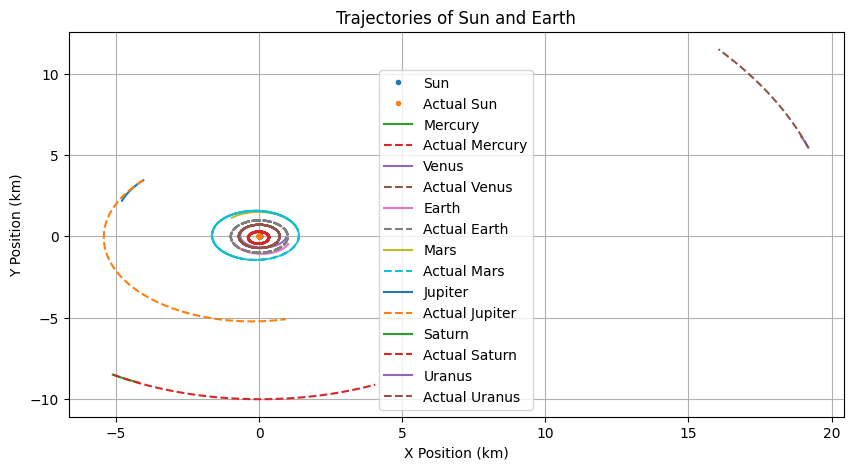

Epoch [2/101], Loss: 2.123400
Epoch [3/101], Loss: 2.130484
Epoch [4/101], Loss: 2.133369
Epoch [5/101], Loss: 2.132023
Epoch [6/101], Loss: 2.126521
Epoch [7/101], Loss: 2.120224
Epoch [8/101], Loss: 2.110446
Epoch [9/101], Loss: 2.097648
Epoch [10/101], Loss: 2.083107
Epoch [11/101], Loss: 2.070121
Epoch [12/101], Loss: 2.057570
Epoch [13/101], Loss: 2.045510
Epoch [14/101], Loss: 2.035569
Epoch [15/101], Loss: 2.025628
Epoch [16/101], Loss: 2.016208
Epoch [17/101], Loss: 2.008413
Epoch [18/101], Loss: 2.002695
Epoch [19/101], Loss: 1.998209
Epoch [20/101], Loss: 1.996377
Epoch [21/101], Loss: 1.996327


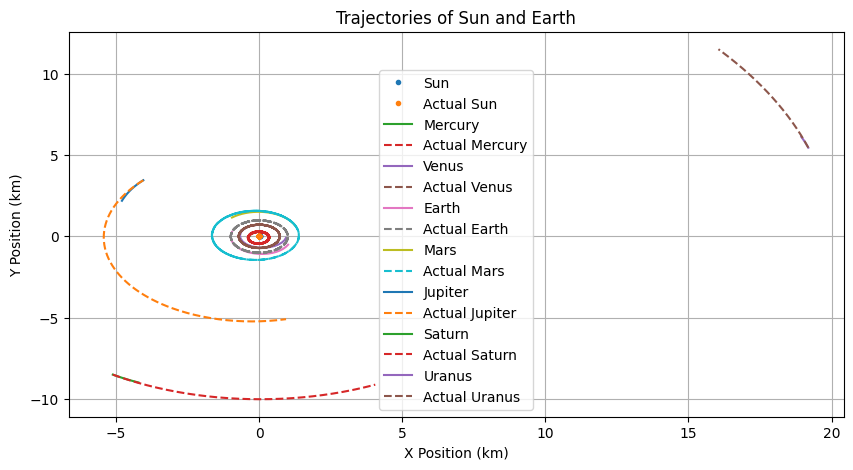

Epoch [22/101], Loss: 1.997341
Epoch [23/101], Loss: 2.000314
Epoch [24/101], Loss: 2.004839
Epoch [25/101], Loss: 2.013070
Epoch [26/101], Loss: 2.023416
Epoch [27/101], Loss: 2.033589
Epoch [28/101], Loss: 2.046140
Epoch [29/101], Loss: 2.058992
Epoch [30/101], Loss: 2.070912
Epoch [31/101], Loss: 2.084103
Epoch [32/101], Loss: 2.102951
Epoch [33/101], Loss: 2.128170
Epoch [34/101], Loss: 2.154658
Epoch [35/101], Loss: 2.173923
Epoch [36/101], Loss: 2.185158
Epoch [37/101], Loss: 2.191579
Epoch [38/101], Loss: 2.195546
Epoch [39/101], Loss: 2.198488
Epoch [40/101], Loss: 2.201040
Epoch [41/101], Loss: 2.204608


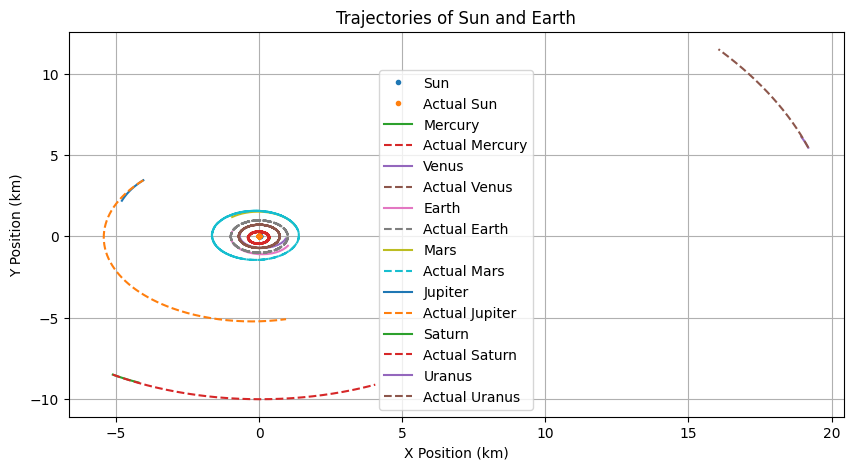

Epoch [42/101], Loss: 2.204959
Epoch [43/101], Loss: 2.202313
Epoch [44/101], Loss: 2.197646
Epoch [45/101], Loss: 2.188931
Epoch [46/101], Loss: 2.178795
Epoch [47/101], Loss: 2.171465
Epoch [48/101], Loss: 2.157763
Epoch [49/101], Loss: 2.145623
Epoch [50/101], Loss: 2.135720
Epoch [51/101], Loss: 2.128223
Epoch [52/101], Loss: 2.123277
Epoch [53/101], Loss: 2.112649
Epoch [54/101], Loss: 2.102337
Epoch [55/101], Loss: 2.095004
Epoch [56/101], Loss: 2.089820
Epoch [57/101], Loss: 2.086676
Epoch [58/101], Loss: 2.084805
Epoch [59/101], Loss: 2.084161
Epoch [60/101], Loss: 2.081841
Epoch [61/101], Loss: 2.076787


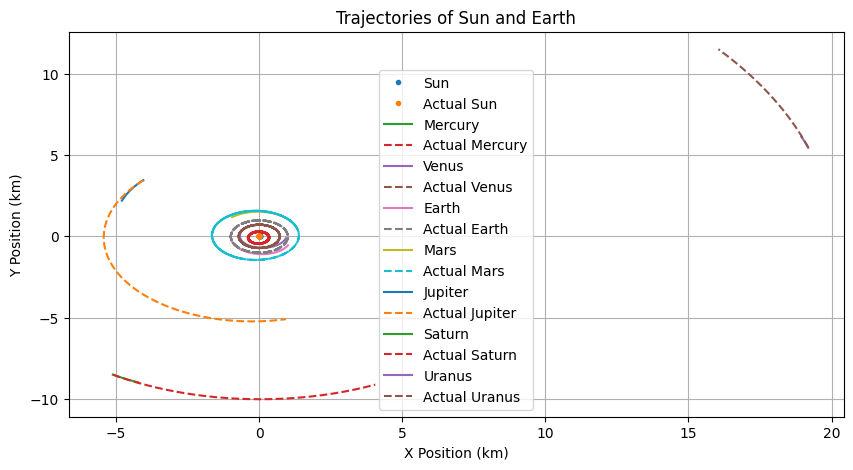

Epoch [62/101], Loss: 2.072844
Epoch [63/101], Loss: 2.070637
Epoch [64/101], Loss: 2.065668
Epoch [65/101], Loss: 2.058102
Epoch [66/101], Loss: 2.049466
Epoch [67/101], Loss: 2.037824
Epoch [68/101], Loss: 2.026159
Epoch [69/101], Loss: 2.018286
Epoch [70/101], Loss: 2.012174
Epoch [71/101], Loss: 2.007186
Epoch [72/101], Loss: 2.005442
Epoch [73/101], Loss: 2.006262
Epoch [74/101], Loss: 2.010033
Epoch [75/101], Loss: 2.010462
Epoch [76/101], Loss: 2.011137
Epoch [77/101], Loss: 2.013714
Epoch [78/101], Loss: 2.016770
Epoch [79/101], Loss: 2.020244
Epoch [80/101], Loss: 2.027681
Epoch [81/101], Loss: 2.035329


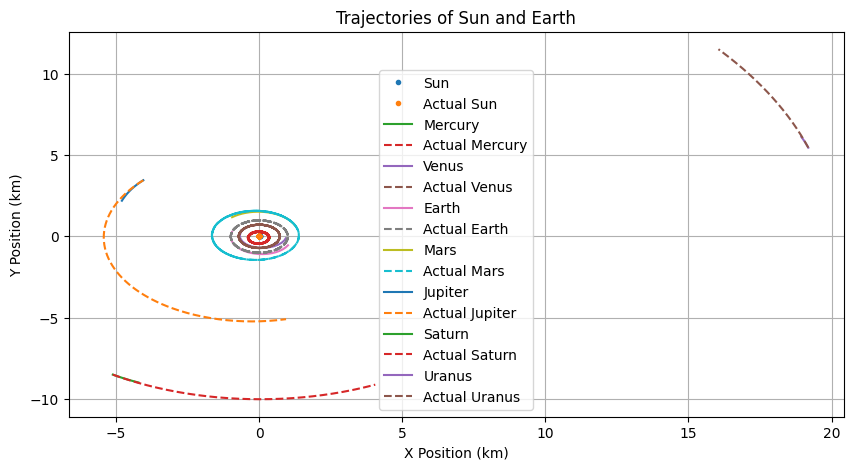

Epoch [82/101], Loss: 2.037334
Epoch [83/101], Loss: 2.033478
Epoch [84/101], Loss: 2.026375
Epoch [85/101], Loss: 2.016668
Epoch [86/101], Loss: 2.008377
Epoch [87/101], Loss: 2.002766
Epoch [88/101], Loss: 2.000522
Epoch [89/101], Loss: 1.995858
Epoch [90/101], Loss: 1.994929
Epoch [91/101], Loss: 1.997395
Epoch [92/101], Loss: 2.001562
Epoch [93/101], Loss: 2.008252
Epoch [94/101], Loss: 2.011125
Epoch [95/101], Loss: 2.018066
Epoch [96/101], Loss: 2.023143
Epoch [97/101], Loss: 2.023036
Epoch [98/101], Loss: 2.019274
Epoch [99/101], Loss: 2.018690
Epoch [100/101], Loss: 2.018763
Epoch [101/101], Loss: 2.017076


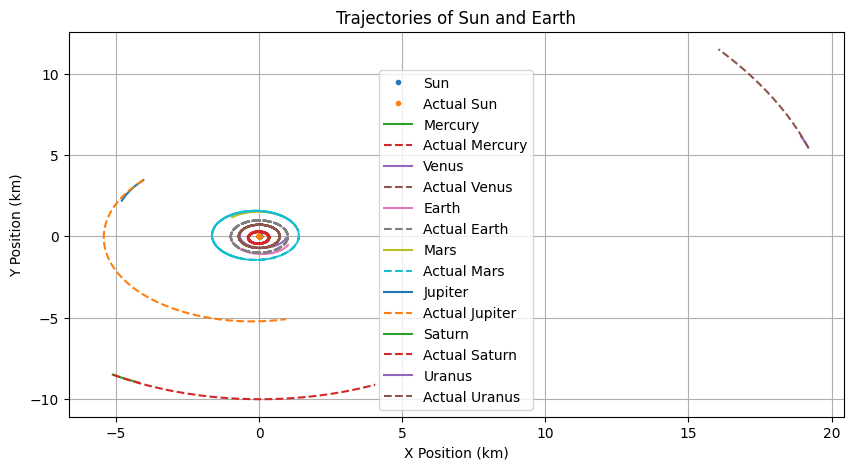

Training complete.


In [ ]:
# model = OrbitalDynamics(initial_pos=obs_trajectory[0], initial_vel=obs_vel[0],
#                         planet_list = planet_list)
# model.to(device)
# model.train()


# lr = 0.1
# optimizer = torch.optim.Adam(model.parameters(), lr=lr)
num_epochs = 101

# # Define the loss function
loss_fn = relative_squared_error

# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Simulate the trajectories using the current model parameters
    simulated_trajectory = model.simulate(times[:20])
    simulated_trajectory.to(device)
    obs_trajectory.to(device)
    # Extract simulated positions and velocities
    # simulated_positions = simulated_trajectory[:, :, :3]  # Shape: (num_times, num_planets, 3)
    # simulated_velocities = simulated_trajectory[:, :, 3:]  # Shape: (num_times, num_planets, 3)
    # Compute the loss between observed and simulated data
    loss = loss_fn(simulated_trajectory[:20], obs_trajectory[:20])
    
    # Backpropagate and update parameters
    loss.backward()
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.6f}")
    optimizer.step()

    # Adjust learning rate if loss is below the threshold
#     if loss.item() < 0.02:
    for param_group in optimizer.param_groups:
            param_group['lr'] = 0.001  # Change learning rate to 0.01

    # Print loss for monitoring
    if epoch%20 == 0:
        display_trajectory(simulated_trajectory, obs_trajectory, model.planet_list)

print("Training complete.")

In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

ln_G: -15.285770416259766
ln_mass: tensor([ 4.5444, -0.5481, -0.7218,  0.7921,  2.2501, -0.4523,  5.7895,  5.7360],
       device='cuda:0')


## Vitesse + position

Epoch [1/101], Loss: 1.572328


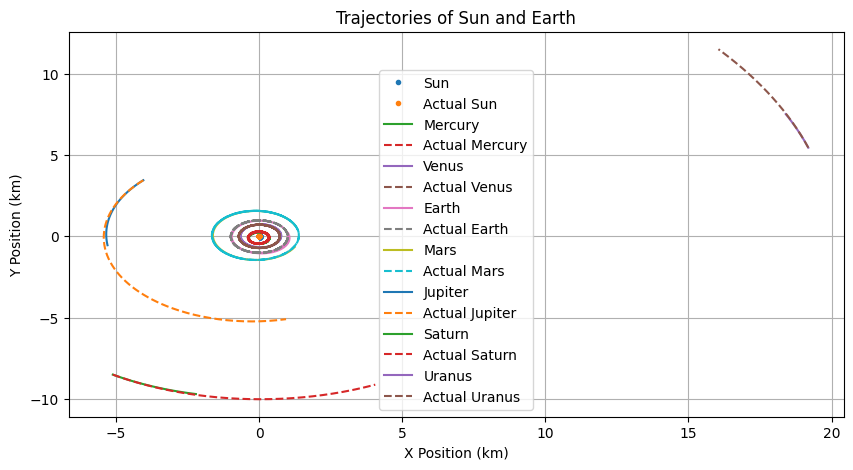

Epoch [2/101], Loss: 3.510146
Epoch [3/101], Loss: 15.493295
Epoch [4/101], Loss: 12.847001
Epoch [5/101], Loss: 5.925622
Epoch [6/101], Loss: 1.065987
Epoch [7/101], Loss: 9.714731
Epoch [8/101], Loss: 2.962167
Epoch [9/101], Loss: 14.170724
Epoch [10/101], Loss: 16.643299
Epoch [11/101], Loss: 6.545698
Epoch [12/101], Loss: 12.659168
Epoch [13/101], Loss: 22.670147
Epoch [14/101], Loss: 14.702977
Epoch [15/101], Loss: 3.384205
Epoch [16/101], Loss: 17.092400
Epoch [17/101], Loss: 21.601904
Epoch [18/101], Loss: 21.859512
Epoch [19/101], Loss: 23.280022
Epoch [20/101], Loss: 20.979240
Epoch [21/101], Loss: 20.613232


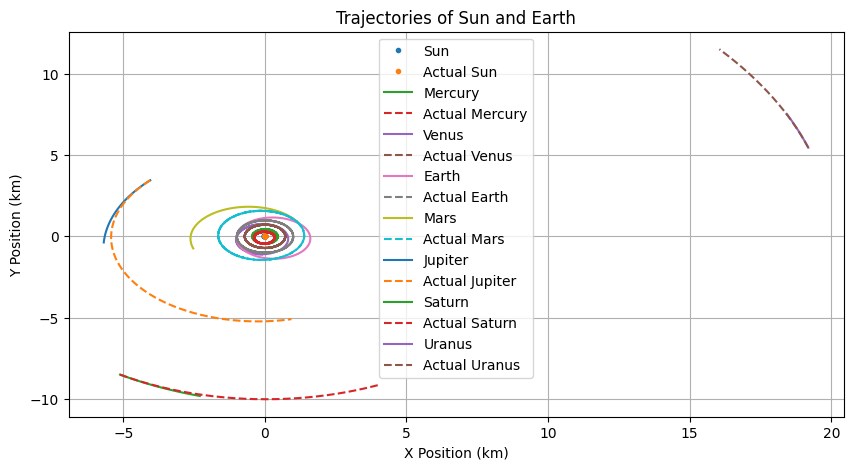

Epoch [22/101], Loss: 17.390692
Epoch [23/101], Loss: 2.393708
Epoch [24/101], Loss: 14.427019
Epoch [25/101], Loss: 26.655275
Epoch [26/101], Loss: 19.591343
Epoch [27/101], Loss: 6.063790
Epoch [28/101], Loss: 14.635861
Epoch [29/101], Loss: 21.360519
Epoch [30/101], Loss: 23.568348
Epoch [31/101], Loss: 25.793589
Epoch [32/101], Loss: 21.665228
Epoch [33/101], Loss: 20.806099
Epoch [34/101], Loss: 14.974788
Epoch [35/101], Loss: 0.205979
Epoch [36/101], Loss: 11.899318
Epoch [37/101], Loss: 16.802561
Epoch [38/101], Loss: 14.645057
Epoch [39/101], Loss: 8.918124
Epoch [40/101], Loss: 2.077836
Epoch [41/101], Loss: 10.033861


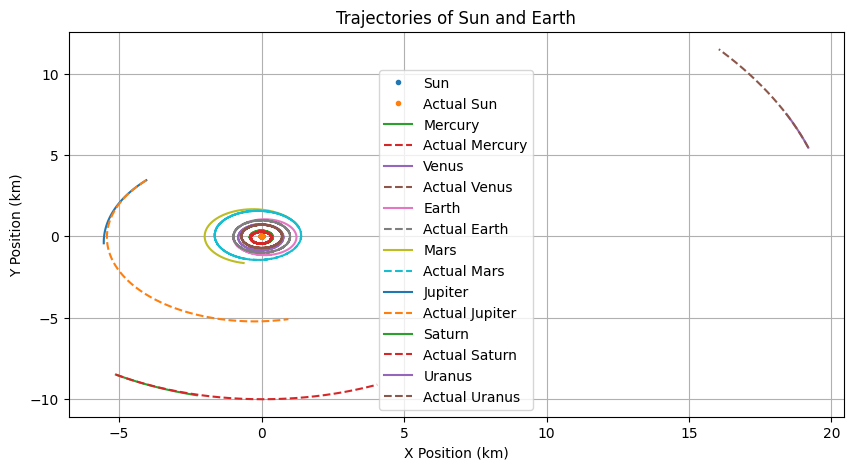

Epoch [42/101], Loss: 6.257379
Epoch [43/101], Loss: 1.136437
Epoch [44/101], Loss: 6.754296
Epoch [45/101], Loss: 2.707324
Epoch [46/101], Loss: 2.549437
Epoch [47/101], Loss: 5.253187
Epoch [48/101], Loss: 0.409308
Epoch [49/101], Loss: 3.587988
Epoch [50/101], Loss: 3.199430
Epoch [51/101], Loss: 0.348919
Epoch [52/101], Loss: 3.360327
Epoch [53/101], Loss: 0.860110
Epoch [54/101], Loss: 1.502104
Epoch [55/101], Loss: 2.222476
Epoch [56/101], Loss: 0.083066
Epoch [57/101], Loss: 1.995223
Epoch [58/101], Loss: 0.644722
Epoch [59/101], Loss: 0.759120
Epoch [60/101], Loss: 1.352865
Epoch [61/101], Loss: 0.041208


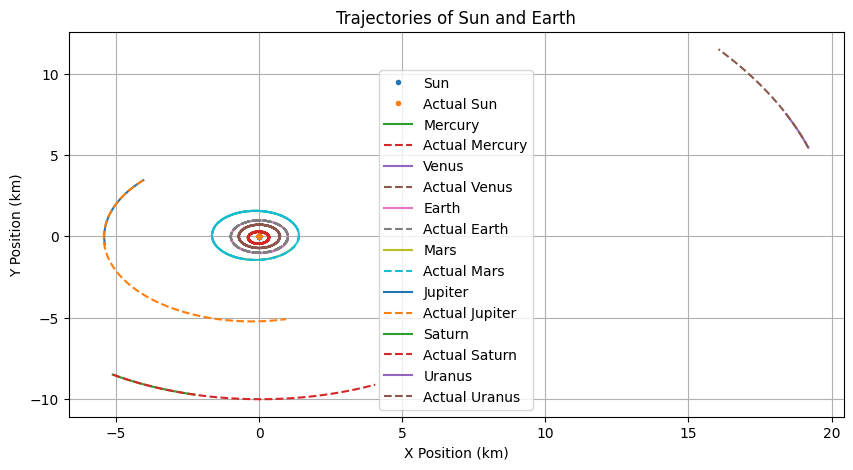

Epoch [62/101], Loss: 1.178462
Epoch [63/101], Loss: 0.382792
Epoch [64/101], Loss: 0.460546
Epoch [65/101], Loss: 0.799278
Epoch [66/101], Loss: 0.041695
Epoch [67/101], Loss: 0.735154
Epoch [68/101], Loss: 0.191787
Epoch [69/101], Loss: 0.332526
Epoch [70/101], Loss: 0.446118
Epoch [71/101], Loss: 0.052752
Epoch [72/101], Loss: 0.459087
Epoch [73/101], Loss: 0.081811
Epoch [74/101], Loss: 0.253888
Epoch [75/101], Loss: 0.234996
Epoch [76/101], Loss: 0.063059
Epoch [77/101], Loss: 0.283262
Epoch [78/101], Loss: 0.035972
Epoch [79/101], Loss: 0.192822
Epoch [80/101], Loss: 0.115208
Epoch [81/101], Loss: 0.072723


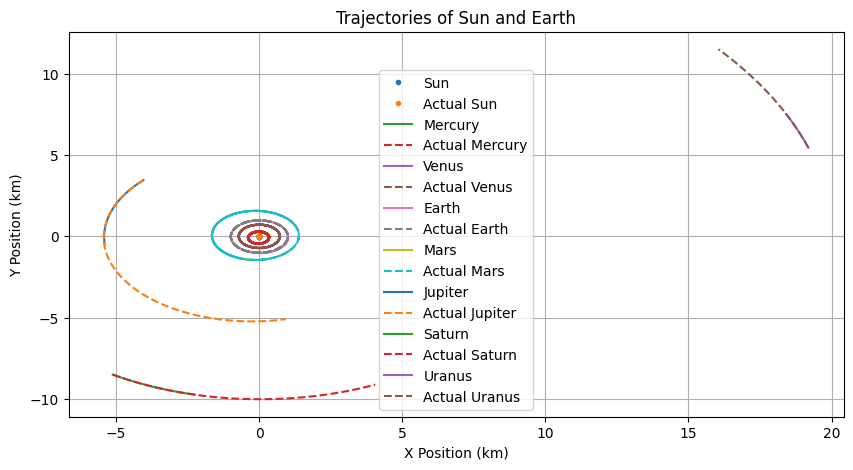

Epoch [82/101], Loss: 0.169436
Epoch [83/101], Loss: 0.025313
Epoch [84/101], Loss: 0.141489
Epoch [85/101], Loss: 0.055869
Epoch [86/101], Loss: 0.072581
Epoch [87/101], Loss: 0.096130
Epoch [88/101], Loss: 0.028226
Epoch [89/101], Loss: 0.098230
Epoch [90/101], Loss: 0.029913
Epoch [91/101], Loss: 0.067171
Epoch [92/101], Loss: 0.053195
Epoch [93/101], Loss: 0.034882
Epoch [94/101], Loss: 0.065894
Epoch [95/101], Loss: 0.023819
Epoch [96/101], Loss: 0.057826
Epoch [97/101], Loss: 0.032121
Epoch [98/101], Loss: 0.039026
Epoch [99/101], Loss: 0.043436
Epoch [100/101], Loss: 0.025633
Epoch [101/101], Loss: 0.045197


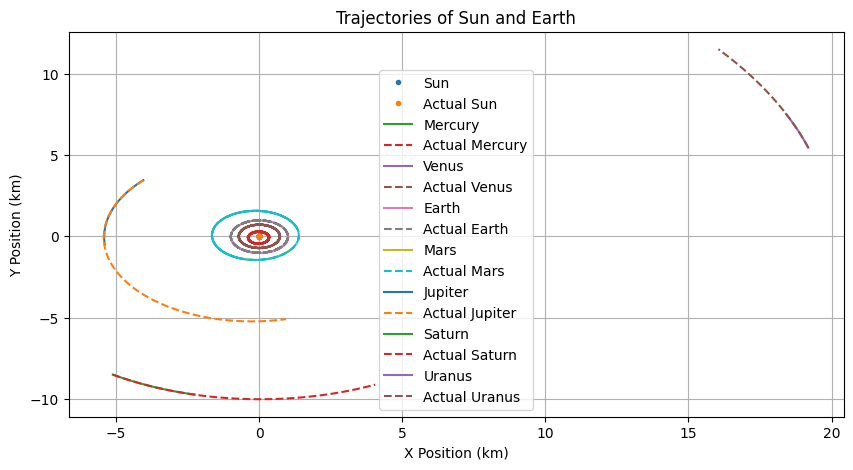

Training complete.


In [ ]:
########## Vitesse ajoutée à l'erreur


# model3 = OrbitalDynamics(initial_pos=obs_trajectory[0], initial_vel=obs_vel[0],
#                         planet_list = planet_list)
# model3.to(device)
# model3.train()

# obs_state = torch.cat([obs_trajectory, obs_vel], dim = 1)
# lr = 0.01
# optimizer3 = torch.optim.Adam(model3.parameters(), lr=lr)
num_epochs = 101

# # Define the loss function
loss_fn = relative_squared_error

# Training loop
for epoch in range(num_epochs):
    optimizer3.zero_grad()

    # Simulate the trajectories using the current model parameters
    simulated_trajectory = model3.simulate(times[:(60 if epoch%20 ==0 else 20)], mode = "velocity")

    # Extract simulated positions and velocities
    # simulated_positions = simulated_trajectory[:, :, :3]  # Shape: (num_times, num_planets, 3)
    # simulated_velocities = simulated_trajectory[:, :, 3:]  # Shape: (num_times, num_planets, 3)
    # Compute the loss between observed and simulated data
    loss = loss_fn(simulated_trajectory[:20], obs_state[:20])
    
    # Backpropagate and update parameters
    loss.backward()
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.6f}")
    optimizer3.step()

    # Adjust learning rate if loss is below the threshold
    # if loss.item() < 0.02:
    for param_group in optimizer3.param_groups:
            param_group['lr'] = 0.1  # Change learning rate to 0.01

    # Print loss for monitoring
    if epoch%20 == 0:
        display_trajectory(simulated_trajectory, obs_trajectory, model3.planet_list)

print("Training complete.")

In [ ]:
for name, param in model3.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

ln_G: -15.471490859985352
ln_mass: tensor([ 4.7510, -4.5663, -4.8809, -2.0233, -0.8481, -4.5070,  2.3359,  2.6154],
       device='cuda:0')


## Que la vitesse comme erreur

Epoch [1/101], Loss: 0.006222


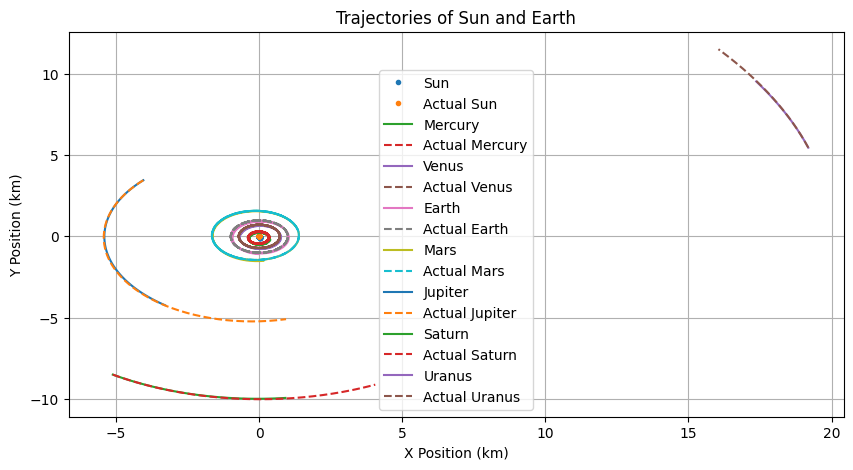

Epoch [2/101], Loss: 0.006204
Epoch [3/101], Loss: 0.006186
Epoch [4/101], Loss: 0.006169
Epoch [5/101], Loss: 0.006151
Epoch [6/101], Loss: 0.006134
Epoch [7/101], Loss: 0.006116
Epoch [8/101], Loss: 0.006099
Epoch [9/101], Loss: 0.006082
Epoch [10/101], Loss: 0.006066
Epoch [11/101], Loss: 0.006049
Epoch [12/101], Loss: 0.006032
Epoch [13/101], Loss: 0.006016
Epoch [14/101], Loss: 0.006000
Epoch [15/101], Loss: 0.005984
Epoch [16/101], Loss: 0.005968
Epoch [17/101], Loss: 0.005952
Epoch [18/101], Loss: 0.005936
Epoch [19/101], Loss: 0.005920
Epoch [20/101], Loss: 0.005905
Epoch [21/101], Loss: 0.005890


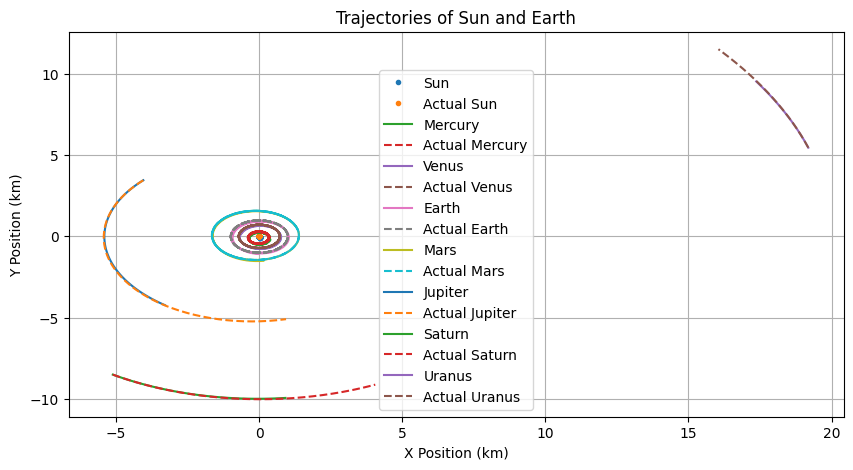

Epoch [22/101], Loss: 0.005874
Epoch [23/101], Loss: 0.005859
Epoch [24/101], Loss: 0.005844
Epoch [25/101], Loss: 0.005829
Epoch [26/101], Loss: 0.005815
Epoch [27/101], Loss: 0.005800
Epoch [28/101], Loss: 0.005785
Epoch [29/101], Loss: 0.005771
Epoch [30/101], Loss: 0.005757
Epoch [31/101], Loss: 0.005742
Epoch [32/101], Loss: 0.005728
Epoch [33/101], Loss: 0.005714
Epoch [34/101], Loss: 0.005700
Epoch [35/101], Loss: 0.005687
Epoch [36/101], Loss: 0.005673
Epoch [37/101], Loss: 0.005659
Epoch [38/101], Loss: 0.005646
Epoch [39/101], Loss: 0.005633
Epoch [40/101], Loss: 0.005619
Epoch [41/101], Loss: 0.005606


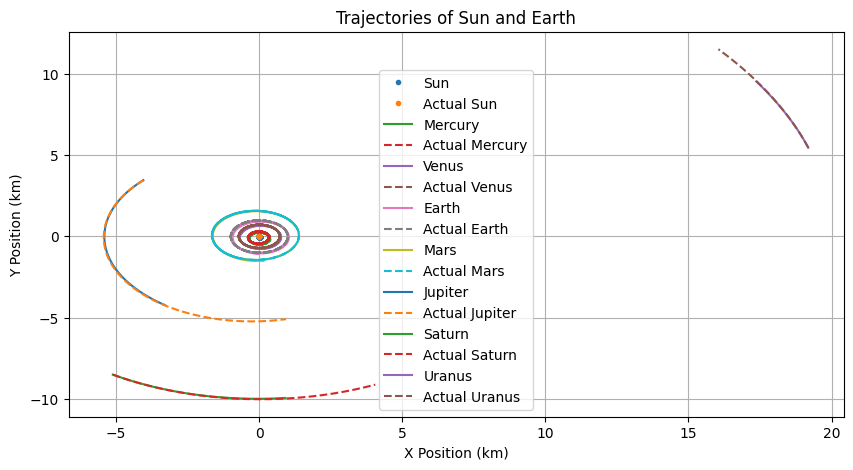

Epoch [42/101], Loss: 0.005593
Epoch [43/101], Loss: 0.005580
Epoch [44/101], Loss: 0.005567
Epoch [45/101], Loss: 0.005554
Epoch [46/101], Loss: 0.005542
Epoch [47/101], Loss: 0.005529
Epoch [48/101], Loss: 0.005516
Epoch [49/101], Loss: 0.005504
Epoch [50/101], Loss: 0.005492
Epoch [51/101], Loss: 0.005480
Epoch [52/101], Loss: 0.005467
Epoch [53/101], Loss: 0.005455
Epoch [54/101], Loss: 0.005443
Epoch [55/101], Loss: 0.005431
Epoch [56/101], Loss: 0.005420
Epoch [57/101], Loss: 0.005408
Epoch [58/101], Loss: 0.005396
Epoch [59/101], Loss: 0.005385
Epoch [60/101], Loss: 0.005373
Epoch [61/101], Loss: 0.005362


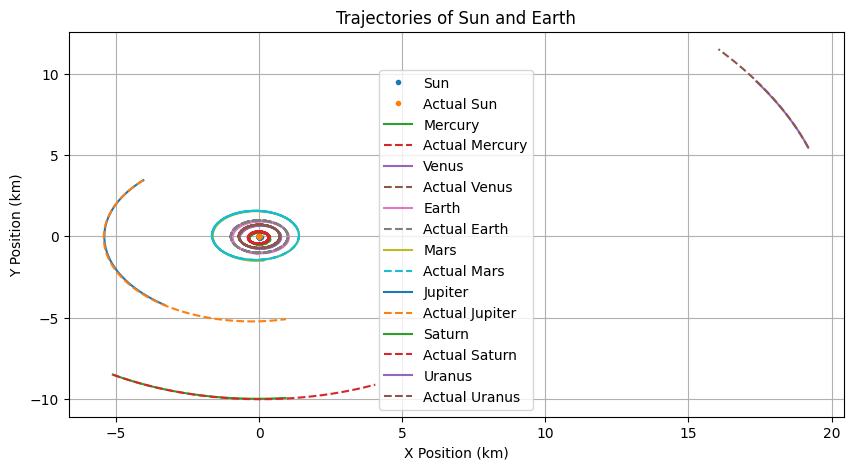

Epoch [62/101], Loss: 0.005350
Epoch [63/101], Loss: 0.005339
Epoch [64/101], Loss: 0.005328
Epoch [65/101], Loss: 0.005317
Epoch [66/101], Loss: 0.005306
Epoch [67/101], Loss: 0.005295
Epoch [68/101], Loss: 0.005284
Epoch [69/101], Loss: 0.005273
Epoch [70/101], Loss: 0.005262
Epoch [71/101], Loss: 0.005252
Epoch [72/101], Loss: 0.005241
Epoch [73/101], Loss: 0.005231
Epoch [74/101], Loss: 0.005220
Epoch [75/101], Loss: 0.005210
Epoch [76/101], Loss: 0.005200
Epoch [77/101], Loss: 0.005189
Epoch [78/101], Loss: 0.005179
Epoch [79/101], Loss: 0.005169
Epoch [80/101], Loss: 0.005159
Epoch [81/101], Loss: 0.005149


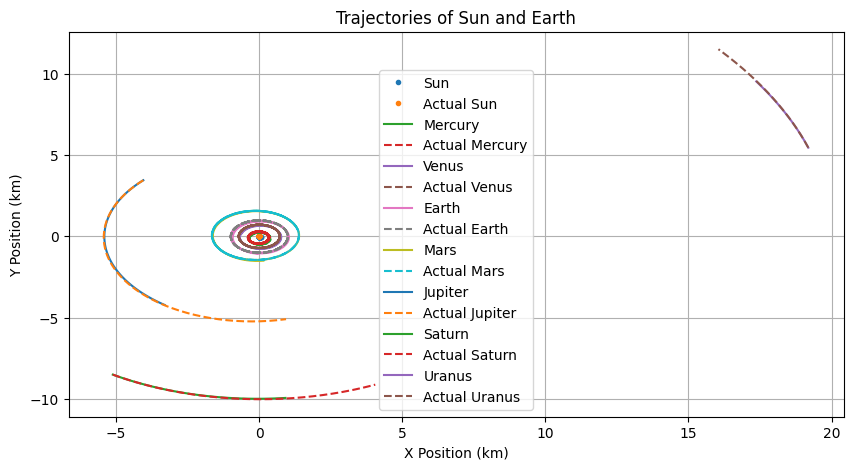

Epoch [82/101], Loss: 0.005139
Epoch [83/101], Loss: 0.005130
Epoch [84/101], Loss: 0.005120
Epoch [85/101], Loss: 0.005110
Epoch [86/101], Loss: 0.005100
Epoch [87/101], Loss: 0.005091
Epoch [88/101], Loss: 0.005081
Epoch [89/101], Loss: 0.005072
Epoch [90/101], Loss: 0.005063
Epoch [91/101], Loss: 0.005053
Epoch [92/101], Loss: 0.005044
Epoch [93/101], Loss: 0.005035
Epoch [94/101], Loss: 0.005026
Epoch [95/101], Loss: 0.005016
Epoch [96/101], Loss: 0.005007
Epoch [97/101], Loss: 0.004998
Epoch [98/101], Loss: 0.004990
Epoch [99/101], Loss: 0.004981
Epoch [100/101], Loss: 0.004972
Epoch [101/101], Loss: 0.004963


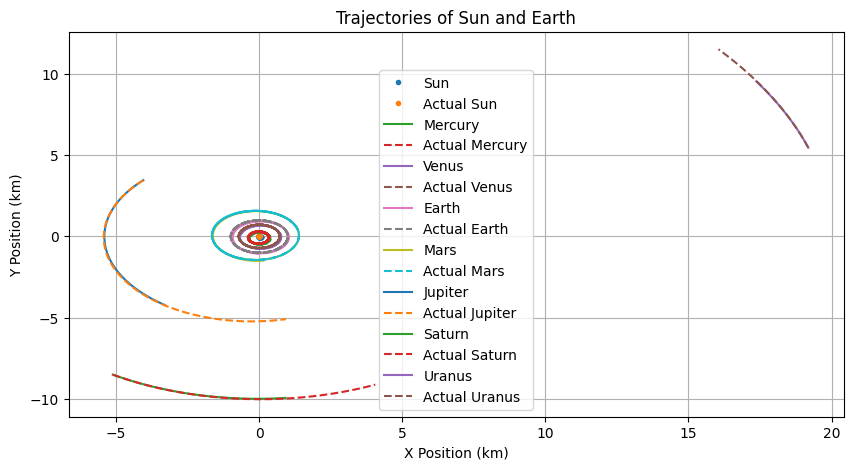

Training complete.


In [ ]:
# model4 = OrbitalDynamics(initial_pos=obs_trajectory[0], initial_vel=obs_vel[0],
#                         planet_list = planet_list)
# model4.to(device)
# model4.train()
# nb_planet = len(planet_list)

# obs_state = torch.cat([obs_trajectory, obs_vel], dim = 1)
# lr = 0.01
# optimizer4 = torch.optim.Adam(model4.parameters(), lr=lr)
num_epochs = 101

# # Define the loss function
loss_fn = relative_squared_error

# Training loop
for epoch in range(num_epochs):
    optimizer4.zero_grad()

    # Simulate the trajectories using the current model parameters
    simulated_trajectory = model4.simulate(times[:(120 if epoch%20 ==0 else 10)], mode = "velocity")

    # Extract simulated positions and velocities
    # simulated_positions = simulated_trajectory[:, :, :3]  # Shape: (num_times, num_planets, 3)
    # simulated_velocities = simulated_trajectory[:, :, 3:]  # Shape: (num_times, num_planets, 3)
    # Compute the loss between observed and simulated data
    loss = loss_fn(simulated_trajectory[:10,nb_planet:], obs_state[:10,nb_planet:])
    
    # Backpropagate and update parameters
    loss.backward()
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.6f}")
    optimizer4.step()

    # Adjust learning rate if loss is below the threshold
    # if loss.item() < 0.02:
    for param_group in optimizer4.param_groups:
            param_group['lr'] = 0.1  # Change learning rate to 0.01

    # Print loss for monitoring
    if epoch%20 == 0:
        display_trajectory(simulated_trajectory, obs_trajectory, model4.planet_list)

print("Training complete.")

In [ ]:
for name, param in model4.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

ln_G: -16.266399383544922
ln_mass: tensor([ 5.5472, -5.5090, -3.8038, -1.6997, -0.9769, -3.5648,  2.7398,  3.9598],
       device='cuda:0')


## G fixé

Epoch [1/101], Loss: 5.575929


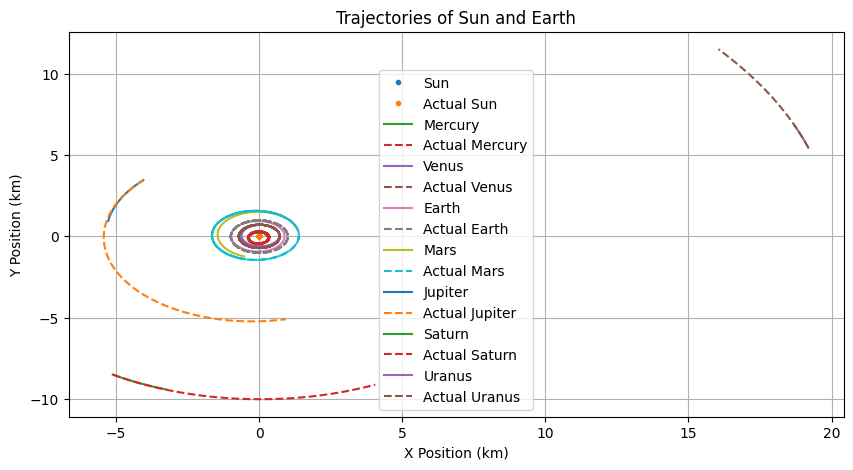

Epoch [2/101], Loss: 1.006859
Epoch [3/101], Loss: 0.906456
Epoch [4/101], Loss: 4.133810
Epoch [5/101], Loss: 4.743304
Epoch [6/101], Loss: 2.362595
Epoch [7/101], Loss: 0.078082
Epoch [8/101], Loss: 1.350919
Epoch [9/101], Loss: 3.051652
Epoch [10/101], Loss: 2.314096
Epoch [11/101], Loss: 0.385150
Epoch [12/101], Loss: 0.332924
Epoch [13/101], Loss: 1.663426
Epoch [14/101], Loss: 1.838331
Epoch [15/101], Loss: 0.708584
Epoch [16/101], Loss: 0.031608
Epoch [17/101], Loss: 0.737281
Epoch [18/101], Loss: 1.271941
Epoch [19/101], Loss: 0.709347
Epoch [20/101], Loss: 0.046798
Epoch [21/101], Loss: 0.313796


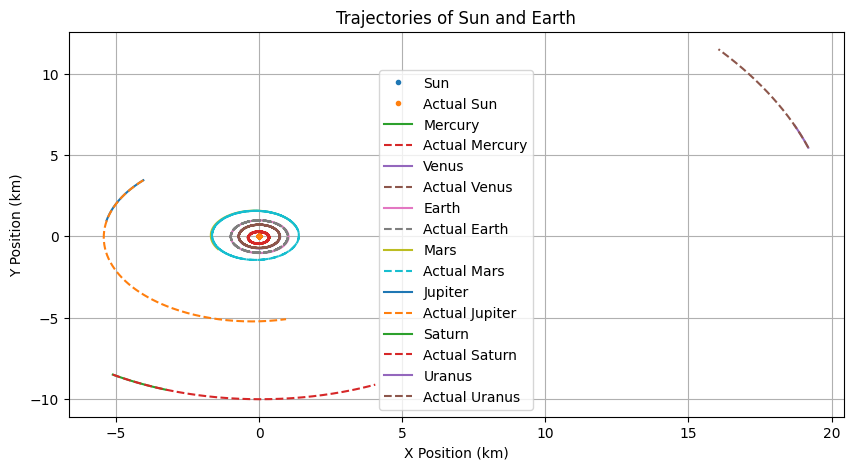

Epoch [22/101], Loss: 0.798377
Epoch [23/101], Loss: 0.616992
Epoch [24/101], Loss: 0.109827
Epoch [25/101], Loss: 0.105599
Epoch [26/101], Loss: 0.472156
Epoch [27/101], Loss: 0.469139
Epoch [28/101], Loss: 0.121884
Epoch [29/101], Loss: 0.045281
Epoch [30/101], Loss: 0.279702
Epoch [31/101], Loss: 0.339010
Epoch [32/101], Loss: 0.127980
Epoch [33/101], Loss: 0.020754
Epoch [34/101], Loss: 0.157353
Epoch [35/101], Loss: 0.234786
Epoch [36/101], Loss: 0.108740
Epoch [37/101], Loss: 0.017605
Epoch [38/101], Loss: 0.095256
Epoch [39/101], Loss: 0.159587
Epoch [40/101], Loss: 0.088781
Epoch [41/101], Loss: 0.017731


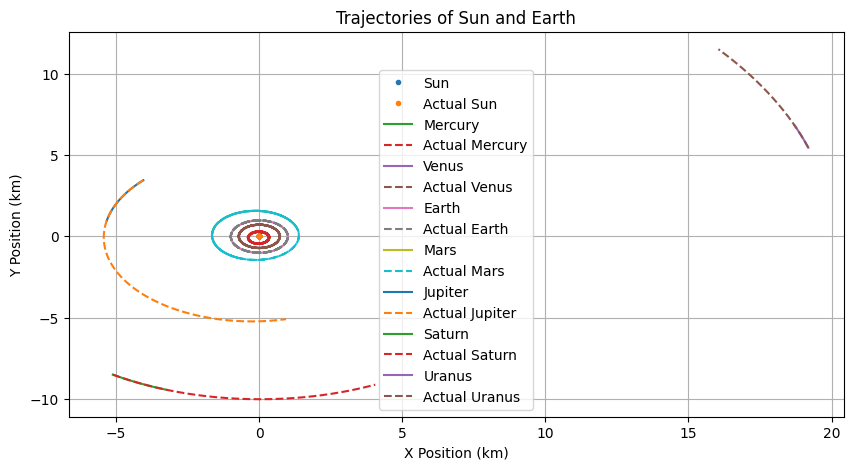

Epoch [42/101], Loss: 0.060401
Epoch [43/101], Loss: 0.110255
Epoch [44/101], Loss: 0.067962
Epoch [45/101], Loss: 0.017387
Epoch [46/101], Loss: 0.042327
Epoch [47/101], Loss: 0.077399
Epoch [48/101], Loss: 0.051380
Epoch [49/101], Loss: 0.016414
Epoch [50/101], Loss: 0.031576
Epoch [51/101], Loss: 0.055292
Epoch [52/101], Loss: 0.038231
Epoch [53/101], Loss: 0.015228
Epoch [54/101], Loss: 0.026140
Epoch [55/101], Loss: 0.041503
Epoch [56/101], Loss: 0.029515
Epoch [57/101], Loss: 0.014315
Epoch [58/101], Loss: 0.021858
Epoch [59/101], Loss: 0.031555
Epoch [60/101], Loss: 0.023003
Epoch [61/101], Loss: 0.013527


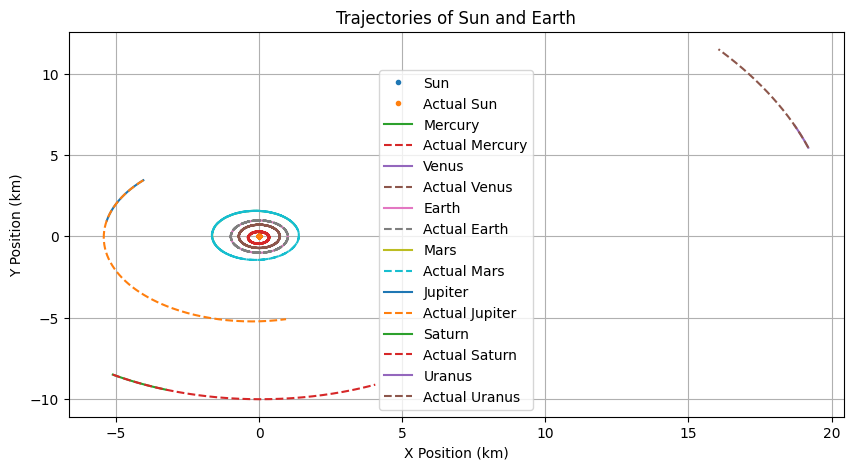

Epoch [62/101], Loss: 0.019325
Epoch [63/101], Loss: 0.025029
Epoch [64/101], Loss: 0.018462
Epoch [65/101], Loss: 0.012714
Epoch [66/101], Loss: 0.017040
Epoch [67/101], Loss: 0.020081
Epoch [68/101], Loss: 0.015189
Epoch [69/101], Loss: 0.012177
Epoch [70/101], Loss: 0.015502
Epoch [71/101], Loss: 0.016711
Epoch [72/101], Loss: 0.012989
Epoch [73/101], Loss: 0.011505
Epoch [74/101], Loss: 0.013960
Epoch [75/101], Loss: 0.014247
Epoch [76/101], Loss: 0.011591
Epoch [77/101], Loss: 0.011049
Epoch [78/101], Loss: 0.012675
Epoch [79/101], Loss: 0.012359
Epoch [80/101], Loss: 0.010601
Epoch [81/101], Loss: 0.010648


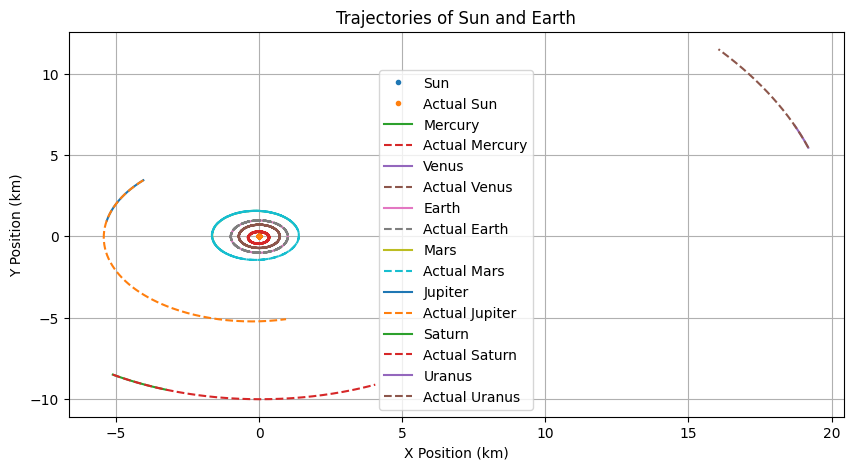

Epoch [82/101], Loss: 0.011612
Epoch [83/101], Loss: 0.010970
Epoch [84/101], Loss: 0.009874
Epoch [85/101], Loss: 0.010203
Epoch [86/101], Loss: 0.010703
Epoch [87/101], Loss: 0.010004
Epoch [88/101], Loss: 0.009391
Epoch [89/101], Loss: 0.009766
Epoch [90/101], Loss: 0.009907
Epoch [91/101], Loss: 0.009295
Epoch [92/101], Loss: 0.009023
Epoch [93/101], Loss: 0.009322
Epoch [94/101], Loss: 0.009243
Epoch [95/101], Loss: 0.008788
Epoch [96/101], Loss: 0.008725
Epoch [97/101], Loss: 0.008898
Epoch [98/101], Loss: 0.008712
Epoch [99/101], Loss: 0.008421
Epoch [100/101], Loss: 0.008453
Epoch [101/101], Loss: 0.008503


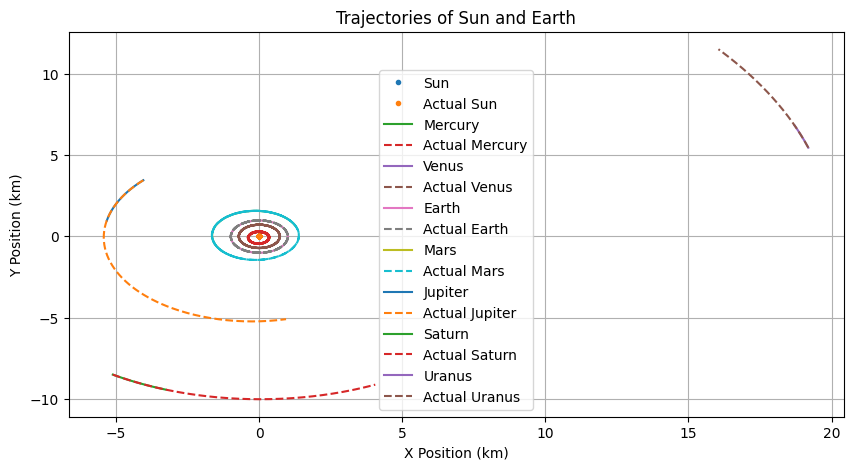

Training complete.


In [96]:
####### Vitesse ajoutée à l'erreur


# model6 = OrbitalDynamics(initial_pos=obs_trajectory[0], initial_vel=obs_vel[0],
#                         planet_list = planet_list, ln_G = torch.tensor(-23.43))
# model6.to(device)
# model6.train()

# obs_state = torch.cat([obs_trajectory, obs_vel], dim = 1)
# lr = 0.01
# optimizer6 = torch.optim.Adam(model6.parameters(), lr=lr)
num_epochs = 101

# # Define the loss function
loss_fn = relative_squared_error

# Training loop
for epoch in range(num_epochs):
    optimizer6.zero_grad()

    # Simulate the trajectories using the current model parameters
    simulated_trajectory = model6.simulate(times[:(40 if epoch%20 ==0 else 20)], mode = "velocity")

    # Extract simulated positions and velocities
    # simulated_positions = simulated_trajectory[:, :, :3]  # Shape: (num_times, num_planets, 3)
    # simulated_velocities = simulated_trajectory[:, :, 3:]  # Shape: (num_times, num_planets, 3)
    # Compute the loss between observed and simulated data
    loss = loss_fn(simulated_trajectory[:20], obs_state[:20])
    
    # Backpropagate and update parameters
    loss.backward()
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.6f}")
    optimizer6.step()

    # Adjust learning rate if loss is below the threshold
    # if loss.item() < 0.02:
    for param_group in optimizer6.param_groups:
            param_group['lr'] = 0.1  # Change learning rate to 0.01

    # Print loss for monitoring
    if epoch%20 == 0:
        display_trajectory(simulated_trajectory, obs_trajectory, model6.planet_list)

print("Training complete.")

In [97]:
for name, param in model6.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

ln_mass: tensor([12.7104,  3.3224, -1.5499,  5.3671,  6.1738, -2.3113,  8.6211,  8.6207],
       device='cuda:0')


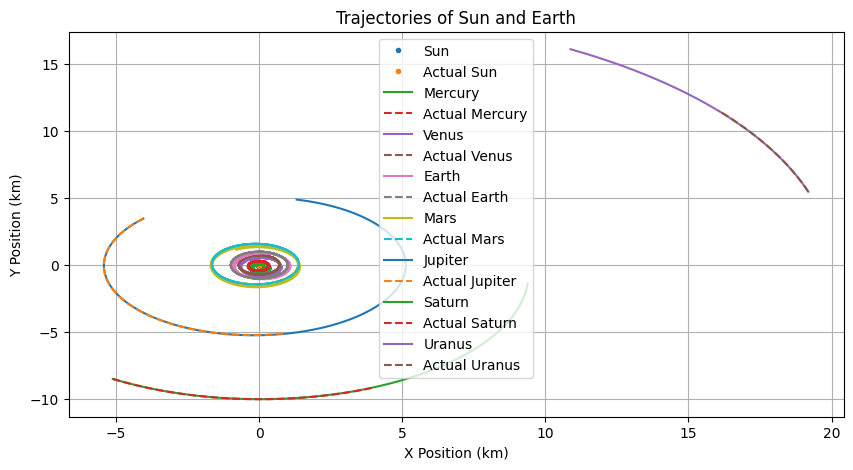

In [99]:
simulated_trajectory = model6.simulate(times[:]*2, mode = "velocity")
display_trajectory(simulated_trajectory, obs_trajectory, model6.planet_list)
